# EMD experiments

Some experiments with the EMD from the [energyflow package package](https://energyflow.network/demos/)

In [1]:
import numpy as np
%load_ext wurlitzer
%matplotlib inline
import matplotlib.pyplot as plt

import energyflow as ef

In [2]:
# load quark and gluon jets
X, y = ef.qg_jets.load(2000, pad=False)
num = 750

# the jet radius for these jets
R = 0.4

# process jets
Gs, Qs = [], []
for arr,events in [(Gs, X[y==0]), (Qs, X[y==1])]:
    for i,x in enumerate(events):
        if i >= num:
            break

        # ignore padded particles and removed particle id information
        x = x[x[:,0] > 0,:3]

        # center jet according to pt-centroid
        yphi_avg = np.average(x[:,1:3], weights=x[:,0], axis=0)
        x[:,1:3] -= yphi_avg

        # mask out any particles farther than R=0.4 away from center (rare)
        x = x[np.linalg.norm(x[:,1:3], axis=1) <= R]

        # add to list
        arr.append(x)

In [16]:
data = np.load('../../data/electron-photon.npz', allow_pickle=True)

x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

maxx = np.max(x_train)
minn = np.min(x_train)

x_train = x_train / maxx
x_test = x_test / maxx

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (100, 32, 32)
x_test:  (100, 32, 32)
y_train:  (100,)
y_test:  (100,)


In [139]:
img = x_train[2]
img2 = x_train[0]

In [140]:
x_dim, y_dim = img.shape
y_pos = np.indices((x_dim, y_dim))[0]
x_pos = np.indices((x_dim, y_dim))[1]
stacked = np.dstack((img, x_pos, y_pos))
stacked = stacked.reshape((x_dim*y_dim, 3))

In [141]:
ev1 = stacked[stacked[:,0]!=0]

In [142]:
x_dim, y_dim = img2.shape
y_pos = np.indices((x_dim, y_dim))[0]
x_pos = np.indices((x_dim, y_dim))[1]
stacked = np.dstack((img2, x_pos, y_pos))
stacked = stacked.reshape((x_dim*y_dim, 3))

In [143]:
ev2 = stacked[stacked[:,0]!=0]

In [144]:
R = 0.4
emdval, G = ef.emd.emd(ev1, ev2, R=R, return_flow=True)
print(emdval)

In [100]:
R = 0.4
emdval, G = ef.emd.emd(ev1, ev1, R=R, return_flow=True)
print(emdval) # should be zero of course

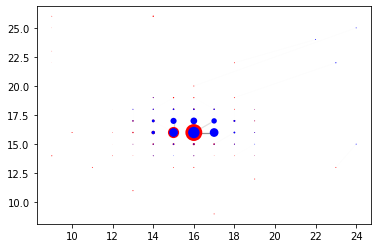

In [226]:
colors = ['red', 'blue']
labels = ['Gluon Jet 1', 'Gluon Jet 2']
for i,ev in enumerate([ev1, ev2]):
    pts, ys, phis = ev[:,0], ev[:,1], ev[:,2]
    plt.scatter(ys, phis, marker='o', s=600*pts, color=colors[i], lw=0, zorder=10, label=labels[i])
    
mx = G.max()
xs, xt = ev1[:,1:3], ev2[:,1:3]
for i in range(xs.shape[0]):
    for j in range(xt.shape[0]):
        if G[i, j] > 0:
            plt.plot([xs[i, 0], xt[j, 0]], [xs[i, 1], xt[j, 1]],
                     alpha=G[i, j]/mx, lw=1.25, color='black')

In [151]:
imgs = x_train[:5]

In [212]:
x_dim, y_dim = imgs.shape[1], imgs.shape[2]
y_pos = np.indices((x_dim, y_dim))[0]
x_pos = np.indices((x_dim, y_dim))[1]
y_posN = np.repeat(y_pos.reshape((1,x_dim,y_dim)), imgs.shape[0], axis=0)
x_posN = np.repeat(x_pos.reshape((1,x_dim,y_dim)), imgs.shape[0], axis=0)

In [214]:
stacked = np.stack((imgs, x_posN, y_posN), axis=3)

In [216]:
stacked = stacked.reshape((5,x_dim*y_dim, 3))

In [219]:
Gs = []
for event in stacked:
    Gs.append(event[event[:,0]!=0])